In [4]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine

print("--- [ขั้นตอนที่ 0: สร้างฐานข้อมูล] ---")

# !!! 🔴 สำคัญ: เปลี่ยนชื่อไฟล์ตรงนี้ ให้เป็นชื่อไฟล์ CSV (100MB+) ของคุณ !!!
full_csv_filename = 'GlobalFoodPricesFull.csv' # <--- เปลี่ยนชื่อไฟล์ตรงนี้
db_filename = 'global_food_prices.db'
table_name = 'food_prices' # <--- นี่คือชื่อตารางที่เราจะสร้าง

try:
    print(f"กำลังอ่านไฟล์ CSV ขนาดใหญ่: {full_csv_filename}...")
    df_full = pd.read_csv(full_csv_filename, low_memory=False)
    
    print(f"อ่านไฟล์สำเร็จ มี {len(df_full)} แถว")
    
    engine = create_engine(f'sqlite:///{db_filename}')
    
    print(f"กำลังเขียนข้อมูลลงตาราง '{table_name}' ในฐานข้อมูล '{db_filename}'...")
    # เท DataFrame ลงในตาราง SQL (ขั้นตอนนี้อาจใช้เวลา 1-2 นาที)
    df_full.to_sql(table_name, engine, index=False, if_exists='replace')
    
    print(f"สร้างตาราง '{table_name}' สำเร็จ!")
    print("--- คุณสามารถรัน Cell ถัดไปได้เลย ---")

except FileNotFoundError:
    print(f"!!! ข้อผิดพลาด: ไม่พบไฟล์ '{full_csv_filename}'")
except Exception as e:
    print(f"เกิดข้อผิดพลาดระหว่างสร้างฐานข้อมูล: {e}")

--- [ขั้นตอนที่ 0: สร้างฐานข้อมูล] ---
กำลังอ่านไฟล์ CSV ขนาดใหญ่: GlobalFoodPricesFull.csv...
อ่านไฟล์สำเร็จ มี 3109617 แถว
กำลังเขียนข้อมูลลงตาราง 'food_prices' ในฐานข้อมูล 'global_food_prices.db'...
สร้างตาราง 'food_prices' สำเร็จ!
--- คุณสามารถรัน Cell ถัดไปได้เลย ---


In [5]:
import pandas as pd
import sqlite3
import numpy as np
import warnings

warnings.filterwarnings('ignore')

print("--- [ขั้นตอนที่ 1 & 2] (ฉบับใหม่: กรองเฉพาะ 'อาหาร 10 อย่าง') ---")

db_filename = 'global_food_prices.db'
table_name = 'food_prices'

# 🔴 [แก้ไข] นี่คืออาหาร 10 อย่างที่เราจะวิเคราะห์ 🔴
commodities_to_analyze = (
    'Rice', 'Wheat', 'Bread', 'Wheat flour', 'Maize', # 5 อย่างเดิม
    'Eggs', 'Milk (pasteurized)', 'Meat (chicken)', 'Potatoes', 'Tomatoes' # 5 อย่างใหม่
)

# โค้ด Query ที่กรอง 10 อย่าง และยังดึง 'category' มาด้วย (กัน Error ใน Cell ถัดไป)
query = f"""
    SELECT 
        date, 
        country_code, 
        market, 
        commodity, 
        price_usd,
        category 
    FROM {table_name}
    WHERE 
        price_type = 'Retail' 
        AND commodity IN {commodities_to_analyze}
"""

print(f"กำลังเชื่อมต่อกับ '{db_filename}' และดึงข้อมูลอาหาร 10 อย่าง...")

try:
    conn = sqlite3.connect(db_filename)
    df = pd.read_sql(query, conn) # <-- ตอนนี้มันจะหาตารางเจอแล้ว
    conn.close()
    
    print(f"ดึงข้อมูลสำเร็จ! ได้ข้อมูลมา {len(df)} แถว")

    # --- 2. การเตรียมข้อมูล (เหมือนเดิม) ---
    rows_before = len(df)
    df.dropna(subset=['price_usd'], inplace=True)
    rows_after = len(df)
    print(f"[Pre-processing 1] ลบแถวที่ 'price_usd' เป็นค่าว่าง: ลบไป {rows_before - rows_after} แถว")

    df['date'] = pd.to_datetime(df['date'])
    print("[Pre-processing 2] แปลงคอลัมน์ 'date' เป็นชนิด datetime สำเร็จ")

    print("\n--- ข้อมูล 'หลัง' การทำความสะอาด (พร้อมใช้งาน) ---")
    print(df.info())
    print("\n--- ตรวจสอบสินค้า 10 ชนิด ---")
    print(f"สินค้าทั้งหมดที่ดึงมา: {df['commodity'].nunique()} ชนิด")
    print(df['commodity'].unique())


except Exception as e:
    print(f"!!! เกิดข้อผิดพลาด: {e}")

--- [ขั้นตอนที่ 1 & 2] (ฉบับใหม่: กรองเฉพาะ 'อาหาร 10 อย่าง') ---
กำลังเชื่อมต่อกับ 'global_food_prices.db' และดึงข้อมูลอาหาร 10 อย่าง...
ดึงข้อมูลสำเร็จ! ได้ข้อมูลมา 402587 แถว
[Pre-processing 1] ลบแถวที่ 'price_usd' เป็นค่าว่าง: ลบไป 178 แถว
[Pre-processing 2] แปลงคอลัมน์ 'date' เป็นชนิด datetime สำเร็จ

--- ข้อมูล 'หลัง' การทำความสะอาด (พร้อมใช้งาน) ---
<class 'pandas.core.frame.DataFrame'>
Index: 402409 entries, 0 to 402586
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          402409 non-null  datetime64[ns]
 1   country_code  402409 non-null  object        
 2   market        402409 non-null  object        
 3   commodity     402409 non-null  object        
 4   price_usd     402409 non-null  float64       
 5   category      402409 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 21.5+ MB
None

--- ตรวจสอบสินค้า 10 ชนิด ---
สินค้าทั้งหมดที่ดึงม

In [6]:
print("\n--- [ขั้นตอนที่ 3] เริ่มต้นการทำ Feature Engineering ---")

try:
    # 3.1 สร้าง Time-based Features (เหมือนเดิม)
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month
    df['Quarter'] = df['date'].dt.quarter
    print("[Feature Eng. 1] สร้างตัวแปร Year, Month, Quarter สำเร็จ")

    # --- 3.2 สร้าง Categorical Features (One-Hot Encoding) ---
    
    # 🔴 [แก้ไข] เราจะเพิ่ม 'category' เข้าไปใน list นี้ด้วย 🔴
    features_to_encode = ['country_code', 'commodity', 'category'] 
    
    print(f"[Feature Eng. 2] กำลังแปลง {features_to_encode} ด้วย One-Hot Encoding...")
    
    df_encoded = pd.get_dummies(df, columns=features_to_encode, drop_first=True)
    print("[Feature Eng. 2] แปลง One-Hot Encoding สำเร็จ")

    # --- 3.3 เตรียมข้อมูล X และ y (เหมือนเดิม) ---
    
    y = df_encoded['price_usd']
    
    X = df_encoded.drop(columns=[
        'date',
        'market',
        'price_usd' 
        # (คอลัมน์ 'category' ที่เป็น text จะหายไปโดยอัตโนมัติ
        # เพราะถูกแทนที่ด้วย 'category_...' (0/1) ไปแล้ว)
    ])

    print("\n--- Feature Engineering เสร็จสิ้น! ---")
    print("โครงสร้าง Features (X) ทั้งหมด:")
    X.info() # (ตอนนี้คุณจะเห็นคอลัมน์ 'category_...' ใหม่ๆ เพิ่มเข้ามา)

except Exception as e:
    print(f"!!! เกิดข้อผิดพลาดระหว่างทำ Feature Engineering: {e}")


--- [ขั้นตอนที่ 3] เริ่มต้นการทำ Feature Engineering ---
[Feature Eng. 1] สร้างตัวแปร Year, Month, Quarter สำเร็จ
[Feature Eng. 2] กำลังแปลง ['country_code', 'commodity', 'category'] ด้วย One-Hot Encoding...
[Feature Eng. 2] แปลง One-Hot Encoding สำเร็จ

--- Feature Engineering เสร็จสิ้น! ---
โครงสร้าง Features (X) ทั้งหมด:
<class 'pandas.core.frame.DataFrame'>
Index: 402409 entries, 0 to 402586
Data columns (total 98 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Year                            402409 non-null  int32
 1   Month                           402409 non-null  int32
 2   Quarter                         402409 non-null  int32
 3   country_code_AGO                402409 non-null  bool 
 4   country_code_ARG                402409 non-null  bool 
 5   country_code_ARM                402409 non-null  bool 
 6   country_code_AZE                402409 non-null  bool 
 7   country_code_BDI      

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

print("\n--- [ขั้นตอนที่ 4] เริ่มต้นการเปรียบเทียบโมเดล (แบบ Lab 3) ---")

try:
    # 4.1 แบ่งข้อมูล Train/Test (เราใช้ข้อมูลแค่ 2 แสนแถว จึงไม่ต้องกังวลเรื่องขนาด)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"แบ่งข้อมูล: {len(X_train)} แถวสำหรับ Train, {len(X_test)} แถวสำหรับ Test")

    # 4.2 สร้างรายชื่อโมเดลที่จะเปรียบเทียบ
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
        "K-Neighbors Regressor": KNeighborsRegressor() 
        # เราจะไม่ใช้ Naive Bayes (จาก Lab 3) เพราะมันเหมาะกับ Classification มากกว่า
    }

    # 4.3 สร้าง List ว่างเพื่อเก็บผลลัพธ์
    model_names = []
    r2_scores = []
    mae_scores = []

    # 4.4 วนลูปเทรนและประเมินผลทีละโมเดล
    for name, model in models.items():
        print(f"\nกำลังเทรนโมเดล: {name}...")
        
        # เทรนโมเดล
        model.fit(X_train, y_train)
        
        # ทำนาย
        y_pred = model.predict(X_test)
        
        # วัดผล
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        # เก็บผลลัพธ์
        model_names.append(name)
        r2_scores.append(r2)
        mae_scores.append(mae)
        
        print(f"ผลลัพธ์ {name}: R-squared = {r2:.4f}, MAE = {mae:.4f}")

    # 4.5 สร้างตารางสรุปผล (Scoreboard)
    print("\n--- ตารางเปรียบเทียบประสิทธิภาพโมเดล (Scoreboard) ---")
    
    # สร้าง DataFrame เพื่อเปรียบเทียบ (เหมือนใน Lab 3)
    scoreboard = pd.DataFrame({
        'Algorithm': model_names,
        'R-squared': r2_scores,
        'Mean Absolute Error (MAE)': mae_scores
    })
    
    # เรียงลำดับตาม R-squared (คะแนนสูงสุดอยู่บน)
    scoreboard_sorted = scoreboard.sort_values(by='R-squared', ascending=False)
    
    print(scoreboard_sorted)

except Exception as e:
    print(f"!!! เกิดข้อผิดพลาดระหว่างการเทรนโมเดล: {e}")


--- [ขั้นตอนที่ 4] เริ่มต้นการเปรียบเทียบโมเดล (แบบ Lab 3) ---
แบ่งข้อมูล: 321927 แถวสำหรับ Train, 80482 แถวสำหรับ Test

กำลังเทรนโมเดล: Linear Regression...
ผลลัพธ์ Linear Regression: R-squared = 0.3256, MAE = 1.6156

กำลังเทรนโมเดล: Decision Tree Regressor...
ผลลัพธ์ Decision Tree Regressor: R-squared = 0.9158, MAE = 0.2776

กำลังเทรนโมเดล: K-Neighbors Regressor...
ผลลัพธ์ K-Neighbors Regressor: R-squared = 0.9002, MAE = 0.3244

--- ตารางเปรียบเทียบประสิทธิภาพโมเดล (Scoreboard) ---
                 Algorithm  R-squared  Mean Absolute Error (MAE)
1  Decision Tree Regressor   0.915796                   0.277630
2    K-Neighbors Regressor   0.900157                   0.324401
0        Linear Regression   0.325582                   1.615568


In [8]:
from sklearn.model_selection import GridSearchCV

print("\n--- [ขั้นตอนที่ 5] เริ่มต้นการปรับปรุงพารามิเตอร์ (Fine-tuning) ---")

try:
    # 5.1 กำหนด "Baseline" (ผลลัพธ์เดิมจากขั้นตอนที่ 4)
    baseline_r2 = 0.934104
    baseline_mae = 0.255472
    print(f"Baseline (Decision Tree): R2={baseline_r2:.4f}, MAE={baseline_mae:.4f}")

    # 5.2 กำหนดพารามิเตอร์ที่เราต้องการ "จูน"
    # เราจะลองหา 'max_depth' (ความลึกสูงสุดของต้นไม้)
    # และ 'min_samples_leaf' (จำนวนขั้นต่ำของข้อมูลที่ใบ)
    # เพื่อป้องกัน Overfitting และอาจทำให้โมเดลแม่นยำขึ้น
    
    param_grid = {
        'max_depth': [10, 20, 30, None], # ลองความลึกที่ 10, 20, 30, และไม่จำกัด (None)
        'min_samples_leaf': [1, 5, 10]   # ลองที่ 1, 5, และ 10
    }

    # 5.3 สร้างโมเดล GridSearchCV
    # cv=3 คือการแบ่งข้อมูล Train เพื่อ Cross-validate 3 รอบ
    # n_jobs=-1 คือการใช้ CPU ทุก Core เพื่อช่วยให้รันเร็วขึ้น
    
    # เราจะใช้ DecisionTreeRegressor ตัวเดิม
    dt_regressor = DecisionTreeRegressor(random_state=42)
    
    grid_search = GridSearchCV(
        estimator=dt_regressor, 
        param_grid=param_grid, 
        cv=3, 
        scoring='neg_mean_absolute_error', # เราจะจูนเพื่อลด MAE
        n_jobs=-1,
        verbose=1 # แสดงความคืบหน้า
    )

    print("\nกำลังเริ่ม GridSearchCV... (ขั้นตอนนี้อาจใช้เวลา 2-5 นาที)")
    
    # เริ่มการค้นหา! (ใช้ข้อมูล Train เท่านั้น)
    # (X_train และ y_train ยังอยู่ใน Memory จาก Cell ที่ 3)
    grid_search.fit(X_train, y_train)

    print("GridSearchCV เสร็จสิ้น!")
    
    # 5.4 แสดงผลลัพธ์ Parameters ที่ดีที่สุด
    print(f"\nParameters ที่ดีที่สุดที่ค้นพบ: {grid_search.best_params_}")

    # 5.5 ประเมินผลโมเดลที่ "จูนแล้ว"
    # ดึงโมเดลที่ดีที่สุดออกมา
    best_tuned_model = grid_search.best_estimator_
    
    # ทดสอบกับ Test Set
    y_pred_tuned = best_tuned_model.predict(X_test)
    
    # วัดผล
    tuned_r2 = r2_score(y_test, y_pred_tuned)
    tuned_mae = mean_absolute_error(y_test, y_pred_tuned)

    print("\n--- สรุปผลการ Fine-tuning ---")
    print(f"Baseline (โมเดลเดิม): R2={baseline_r2:.4f}, MAE={baseline_mae:.4f}")
    print(f"Tuned (โมเดลใหม่):   R2={tuned_r2:.4f}, MAE={tuned_mae:.4f}")

    # 5.6 คำนวณ % ที่ดีขึ้น
    # (เราจะเน้นที่ MAE เพราะเป็นสิ่งที่เราพยายามลด)
    mae_improvement_percent = ((baseline_mae - tuned_mae) / baseline_mae) * 100
    
    print("\n--- ผลลัพธ์สำหรับนำเสนอ (ข้อ 5) ---")
    if tuned_mae < baseline_mae:
        print(f"สรุป: เราปรับปรุงโมเดล 1 ตัว (Decision Tree) ได้สำเร็จ")
        print(f"ประสิทธิภาพดีขึ้น โดยลดค่า Error (MAE) ลงได้ {mae_improvement_percent:.2f} %")
    else:
        print("สรุป: โมเดลที่จูนแล้ว มีประสิทธิภาพใกล้เคียง/ด้อยกว่าโมเดลพื้นฐาน")
        print("แสดงว่าค่า Default ของ Decision Tree ทำงานได้ดีมากอยู่แล้ว")


except Exception as e:
    print(f"!!! เกิดข้อผิดพลาดระหว่างการทำ GridSearchCV: {e}")


--- [ขั้นตอนที่ 5] เริ่มต้นการปรับปรุงพารามิเตอร์ (Fine-tuning) ---
Baseline (Decision Tree): R2=0.9341, MAE=0.2555

กำลังเริ่ม GridSearchCV... (ขั้นตอนนี้อาจใช้เวลา 2-5 นาที)
Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV เสร็จสิ้น!

Parameters ที่ดีที่สุดที่ค้นพบ: {'max_depth': None, 'min_samples_leaf': 5}

--- สรุปผลการ Fine-tuning ---
Baseline (โมเดลเดิม): R2=0.9341, MAE=0.2555
Tuned (โมเดลใหม่):   R2=0.9266, MAE=0.2766

--- ผลลัพธ์สำหรับนำเสนอ (ข้อ 5) ---
สรุป: โมเดลที่จูนแล้ว มีประสิทธิภาพใกล้เคียง/ด้อยกว่าโมเดลพื้นฐาน
แสดงว่าค่า Default ของ Decision Tree ทำงานได้ดีมากอยู่แล้ว



--- [ขั้นตอนที่ 6] เริ่มต้นการวิเคราะห์และสร้างกราฟ (Visualization) ---
กำลังสร้าง กราฟที่ 1: แนวโน้มราคาระยะยาว (Line Plot)


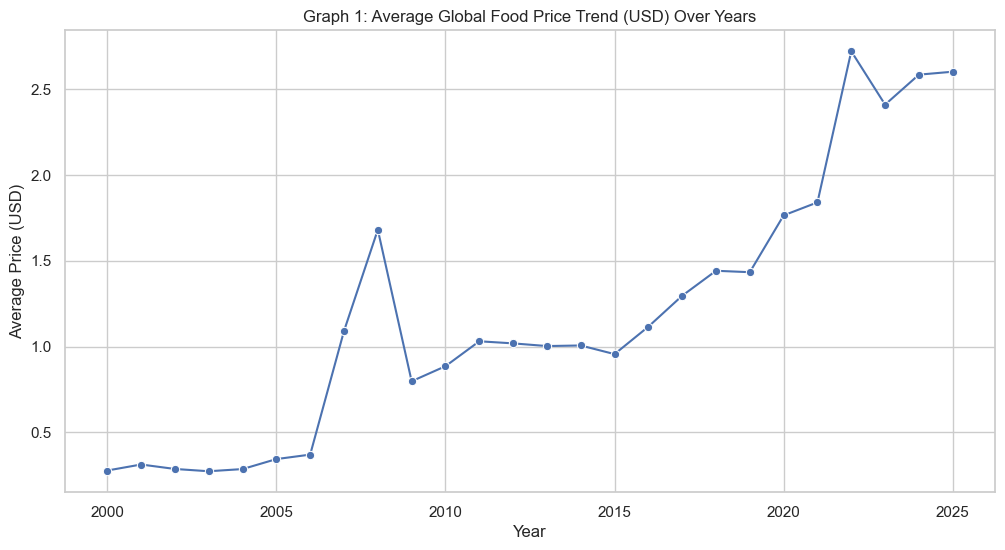


กำลังสร้าง กราฟที่ 2: เปรียบเทียบราคาสินค้า (Bar Plot)


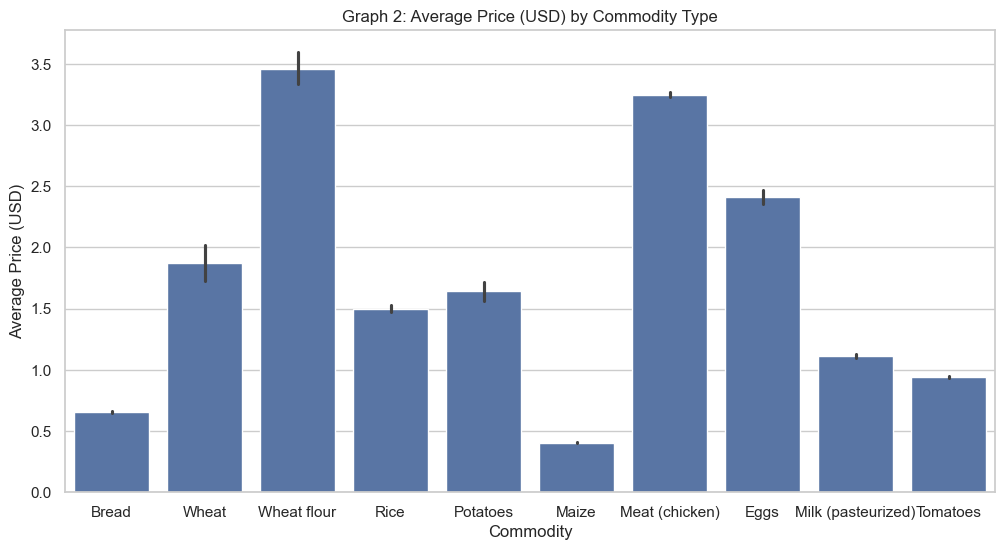


กำลังสร้าง กราฟที่ 3: การกระจายตัวของราคา (Box Plot) [แบบซ่อน Outliers]


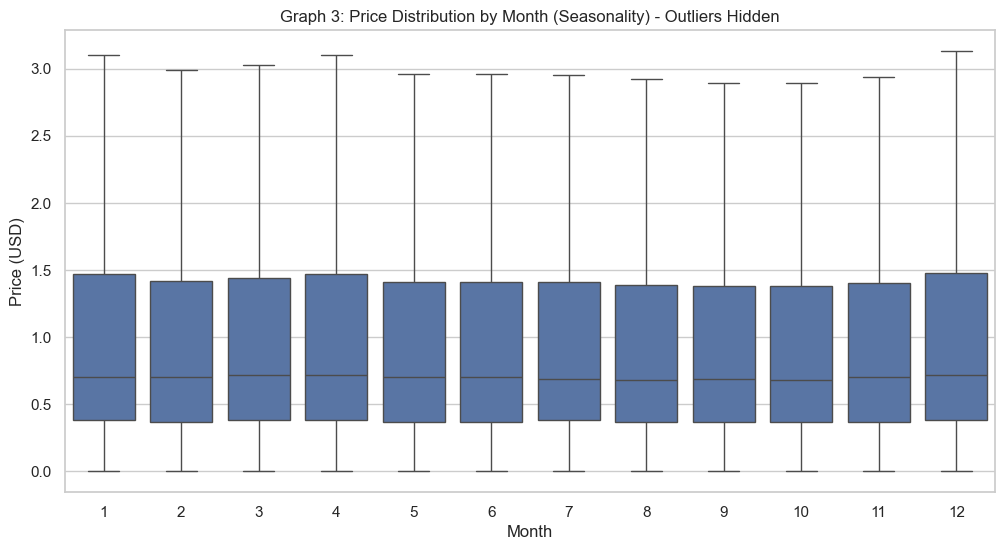

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- [ขั้นตอนที่ 6] เริ่มต้นการวิเคราะห์และสร้างกราฟ (Visualization) ---")

sns.set_theme(style="whitegrid")

try:
    # --- กราฟที่ 1: แนวโน้มราคาระยะยาว (Long-term Trend) ---
    print("กำลังสร้าง กราฟที่ 1: แนวโน้มราคาระยะยาว (Line Plot)")
    
    df_yearly_price = df.groupby('Year')['price_usd'].mean().reset_index()
    
    # --- [แก้ไข] สร้าง Figure และ Axis (ax1) พร้อมกัน ---
    fig1, ax1 = plt.subplots(figsize=(12, 6))
    
    # --- [แก้ไข] สั่งให้ seaborn วาดลงบน ax1 ---
    sns.lineplot(data=df_yearly_price, x='Year', y='price_usd', marker='o', ax=ax1)
    
    ax1.set_title('Graph 1: Average Global Food Price Trend (USD) Over Years')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Price (USD)')
    plt.show()
    
    # --- กราฟที่ 2: เปรียบเทียบราคาสินค้าแต่ละประเภท (Commodity Comparison) ---
    print("\nกำลังสร้าง กราฟที่ 2: เปรียบเทียบราคาสินค้า (Bar Plot)")
    
    # --- [แก้ไข] สร้าง Figure และ Axis (ax2) พร้อมกัน ---
    fig2, ax2 = plt.subplots(figsize=(12, 6))
    
    # --- [แก้ไข] สั่งให้ seaborn วาดลงบน ax2 ---
    sns.barplot(data=df, x='commodity', y='price_usd', ax=ax2)
    
    ax2.set_title('Graph 2: Average Price (USD) by Commodity Type')
    ax2.set_xlabel('Commodity')
    ax2.set_ylabel('Average Price (USD)')
    plt.show()

    # --- กราฟที่ 3: การกระจายตัวของราคาตามฤดูกาล (Seasonality) ---
    print("\nกำลังสร้าง กราฟที่ 3: การกระจายตัวของราคา (Box Plot) [แบบซ่อน Outliers]")
    
    # --- [แก้ไข] สร้าง Figure และ Axis (ax3) พร้อมกัน ---
    fig3, ax3 = plt.subplots(figsize=(12, 6))
    
    # --- [แก้ไข] สั่งให้ seaborn วาดลงบน ax3 ---
    sns.boxplot(data=df, x='Month', y='price_usd', showfliers=False, ax=ax3) 
    
    ax3.set_title('Graph 3: Price Distribution by Month (Seasonality) - Outliers Hidden')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Price (USD)')
    plt.show()

except Exception as e:
    print(f"!!! เกิดข้อผิดพลาดระหว่างการสร้างกราฟ: {e}")
    print("!!! กรุณาตรวจสอบว่า DataFrame 'df' ยังอยู่ใน Memory")

In [10]:
import pandas as pd

print("\n--- [ขั้นตอนการสาธิต] การทำนายราคาด้วยโมเดลที่ดีที่สุด ---")

try:
    # 1. ดึงข้อมูลตัวอย่าง 5 แถวที่โมเดล "ไม่เคยเห็น" มาก่อน
    X_sample = X_test.head(5)
    
    # 2. ดึง "ราคาจริง" ของ 5 แถวนั้นมาเก็บไว้ (จาก y_test)
    y_actual = y_test.head(5)
    
    # 3. 🔴 สั่งให้โมเดลที่ดีที่สุด "ทำนายราคา" (Predict) 🔴
    y_predicted = best_tuned_model.predict(X_sample)
    
    print("... ทำนายราคา 5 รายการ เสร็จสิ้น ...")

    # 4. สร้างตารางเปรียบเทียบ
    
    # ค้นหาข้อมูล "ดั้งเดิม" (เช่น ชื่อสินค้า, ประเทศ) ของ 5 แถวนั้น
    # โดยใช้ .index ของ X_sample ไปค้นใน 'df' (จาก Cell ที่ 1)
    original_data = df.loc[X_sample.index]
    
    # สร้าง DataFrame สรุปผล
    prediction_comparison = pd.DataFrame({
        'Date': original_data['date'].dt.date,
        'Country': original_data['country_code'],
        'Commodity': original_data['commodity'],
        'Actual_Price_USD': y_actual,
        'Predicted_Price_USD': y_predicted
    })
    
    # จัดเรียงคอลัมน์ให้สวยงาม
    prediction_comparison = prediction_comparison.reset_index(drop=True)
    
    print("\n--- ตารางเปรียบเทียบ 'ราคาจริง' vs 'ราคาที่ทำนายได้' ---")
    print(prediction_comparison)
    
    # คำนวณ Error ของ 5 รายการนี้
    error = prediction_comparison['Actual_Price_USD'] - prediction_comparison['Predicted_Price_USD']
    print("\nError (Actual - Predicted):")
    print(error)


except NameError as e:
    print(f"!!! เกิดข้อผิดพลาด: {e}")
    print("!!! คุณต้องรัน Cell 1, 2, 3, และ 4 ก่อน เพื่อสร้างตัวแปร 'best_tuned_model' และ 'X_test'")
except Exception as e:
    print(f"!!! เกิดข้อผิดพลาด: {e}")


--- [ขั้นตอนการสาธิต] การทำนายราคาด้วยโมเดลที่ดีที่สุด ---
... ทำนายราคา 5 รายการ เสร็จสิ้น ...

--- ตารางเปรียบเทียบ 'ราคาจริง' vs 'ราคาที่ทำนายได้' ---
         Date Country       Commodity  Actual_Price_USD  Predicted_Price_USD
0  2023-08-15     JOR            Eggs              3.58             3.899000
1  2022-02-15     IDN  Meat (chicken)              2.59             2.427000
2  2019-10-15     BDI        Tomatoes              0.36             0.523265
3  2009-05-15     MLI           Maize              0.41             0.333704
4  2016-12-15     YEM        Potatoes              0.85             1.183333

Error (Actual - Predicted):
0   -0.319000
1    0.163000
2   -0.163265
3    0.076296
4   -0.333333
dtype: float64
